### Survival Analysis in Camden - vacant units

In [5]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

     |████████████████████████████████| 348 kB 9.2 MB/s eta 0:00:01     |█████████████████████▋          | 235 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 3.5 MB/s  eta 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4035 sha256=b22067bf8b21401b4e2bddf495424aa1d123afccffc228fae9fbc68e1eb006bf
  Stored in directory: /home/jovyan/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=55347b60de96158f5089a2747153484084c8a813cc6653dbf93a31f6a7d1ed89
  Stored in directory: /home/jovyan/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
Successfully built autograd-gamma autograd


In [7]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter

In [31]:
df = pd.read_csv("Camden High Streets/camden-vacant-survival-full.csv", low_memory=False)

In [32]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-open,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31459,31459.0,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,1681 days,4018.0,0.0,2337.0,1681.0,0.0,False,True,Brecknock
1,1,31635,31635.0,00233001110013,E09000007,Camden,Inner London - West,GND F 11,BRECKNOCK ROAD,LONDON,...,2010-04-01,421 days,4018.0,0.0,3597.0,421.0,0.0,False,True,Brecknock
2,2,32163,32163.0,00233004110022,E09000007,Camden,Inner London - West,PT LGND & GND FS 41,BRECKNOCK ROAD,LONDON,...,2010-04-01,3468 days,4018.0,0.0,550.0,3468.0,0.0,False,True,Brecknock
3,3,64852,64852.0,0038700013013A,E09000007,Camden,Inner London - West,GND F BLK A 7 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,3683 days,4018.0,0.0,335.0,3683.0,0.0,False,True,Brecknock
4,4,64878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1129,414838,414838.0,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt
1130,1130,414898,414898.0,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt
1131,1131,414840,414840.0,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,2832.0,1.0,95.0,2737.0,0.0,False,False,Eversholt
1132,1132,414928,414928.0,00782002470010,E09000007,Camden,Inner London - West,SUITE 110. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt


In [33]:
df.loc[df['category'].isnull(), 'category'] = "Other"

In [34]:
df.dropna(subset = ["vacant"], inplace=True)

In [35]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,...,study-start,time-of-entry,time-at-open,vacant,survival,entry,stat,StatusChange,TenantChange,highstreet
0,0,31459,31459.0,0023300030000B,E09000007,Camden,Inner London - West,3,BRECKNOCK ROAD,LONDON,...,2010-04-01,1681 days,4018.0,0.0,2337.0,1681.0,0.0,False,True,Brecknock
1,1,31635,31635.0,00233001110013,E09000007,Camden,Inner London - West,GND F 11,BRECKNOCK ROAD,LONDON,...,2010-04-01,421 days,4018.0,0.0,3597.0,421.0,0.0,False,True,Brecknock
2,2,32163,32163.0,00233004110022,E09000007,Camden,Inner London - West,PT LGND & GND FS 41,BRECKNOCK ROAD,LONDON,...,2010-04-01,3468 days,4018.0,0.0,550.0,3468.0,0.0,False,True,Brecknock
3,3,64852,64852.0,0038700013013A,E09000007,Camden,Inner London - West,GND F BLK A 7 APOLLO STUDIOS 1-7,CHARLTON KINGS ROAD,LONDON,...,2010-04-01,3683 days,4018.0,0.0,335.0,3683.0,0.0,False,True,Brecknock
5,5,31503,31503.0,00233000500017,E09000007,Camden,Inner London - West,GND F 5,BRECKNOCK ROAD,LONDON,...,2010-04-01,1583 days,4018.0,0.0,2435.0,1583.0,0.0,False,True,Brecknock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1129,414838,414838.0,00782002470004,E09000007,Camden,Inner London - West,SUITE 107B.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt
1130,1130,414898,414898.0,00782002470008,E09000007,Camden,Inner London - West,SUITE 108.1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt
1131,1131,414840,414840.0,00782002470005,E09000007,Camden,Inner London - West,SUITE 109. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,2832.0,1.0,95.0,2737.0,0.0,False,False,Eversholt
1132,1132,414928,414928.0,00782002470010,E09000007,Camden,Inner London - West,SUITE 110. 1ST FLR EUSTON HOUSE 24,EVERSHOLT STREET,LONDON,...,2010-04-01,2737 days,4018.0,0.0,1281.0,2737.0,0.0,False,False,Eversholt


          KM_estimate
timeline             
-34.0        0.998967
 10.0        0.997934
 31.0        0.996901
 38.0        0.995868
 40.0        0.994835
...               ...
 3936.0      0.338447
 3955.0      0.338447
 3958.0      0.338447
 3974.0      0.338447
 4018.0      0.338447

[569 rows x 1 columns]


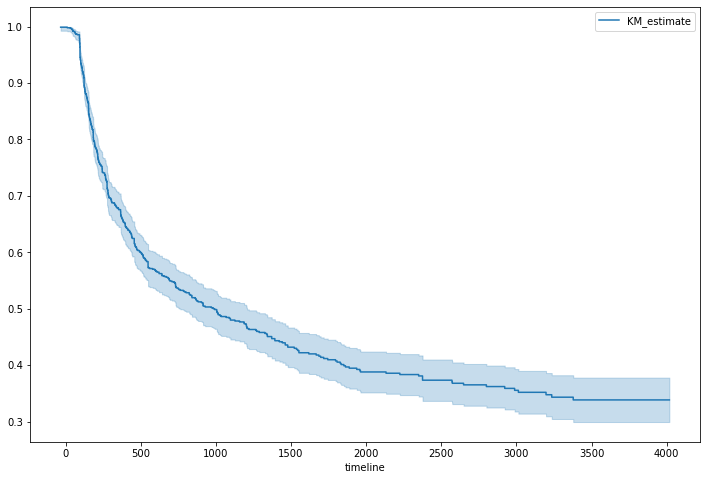

In [40]:
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed= df['vacant'])

print(kmf.survival_function_)
#print(kmf.median_)


fig, ax = plt.subplots(1,1, figsize=(12,8))
ax = kmf.plot(ax=ax, ci_show=True)
fig.savefig('outputs_img/vacancy_survival/Camden-Highstreets-Vacancy-Survival.jpg')

In [41]:
df['highstreet'] = df['highstreet'].astype('category')

In [42]:
df['category'] = df['category'].astype('category')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 0 to 1133
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            968 non-null    int64   
 1   Unnamed: 0.1          968 non-null    int64   
 2   Unnamed: 0.1.1        968 non-null    float64 
 3   rates_code            968 non-null    object  
 4   rates_authority_id    968 non-null    object  
 5   rates_authority       968 non-null    object  
 6   region                968 non-null    object  
 7   address_no            968 non-null    object  
 8   address_street        968 non-null    object  
 9   address_town          968 non-null    object  
 10  pc__pcs               968 non-null    object  
 11  use_category          968 non-null    object  
 12  scat_code             968 non-null    float64 
 13  sub_category          968 non-null    object  
 14  category              968 non-null    category
 15  floor

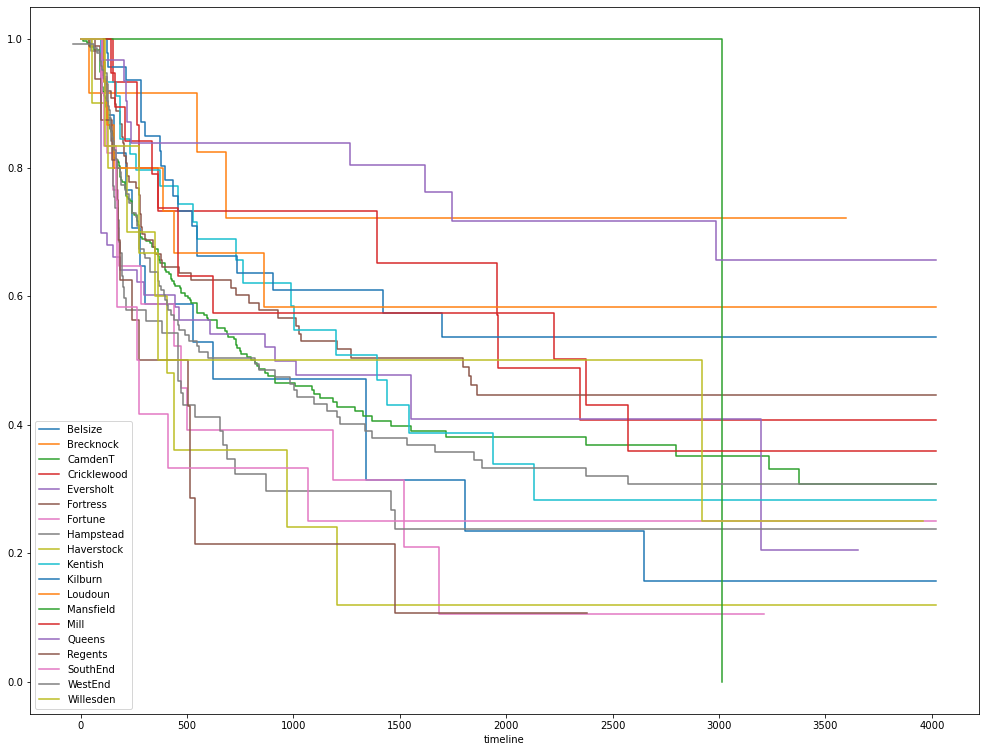

In [45]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('outputs_img/vacancy_survival/Camden-Highstreets-indiv-Survival.jpg')

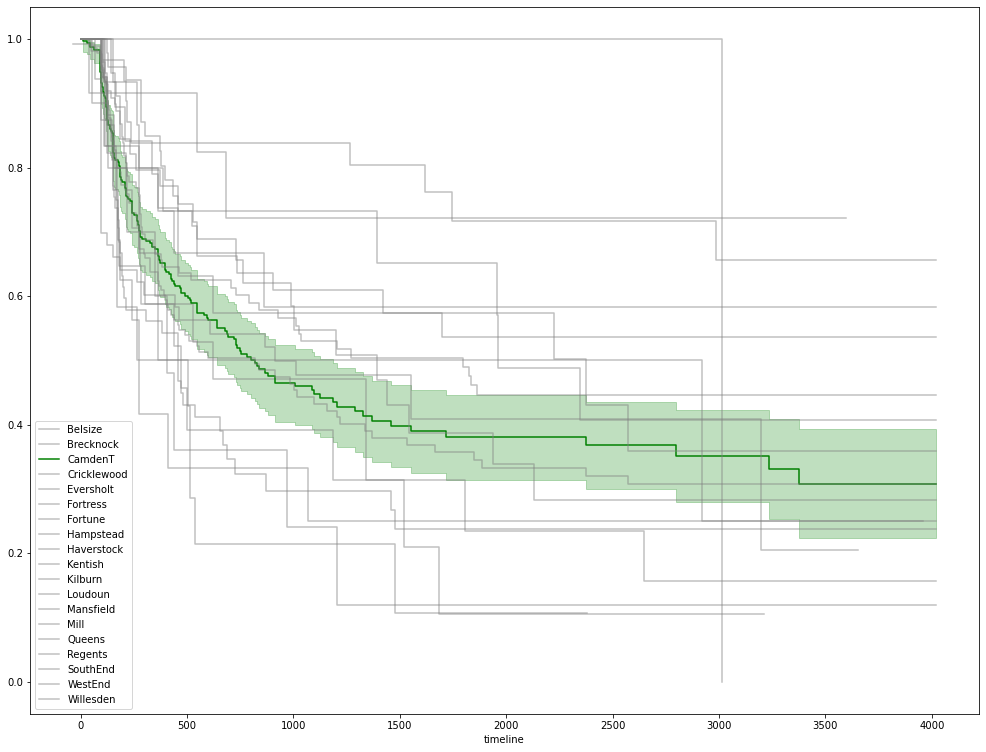

In [51]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'CamdenT':
        ax = kmf.plot(ax=ax, color='g')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
fig.savefig('outputs_img/vacancy_survival/Camden-Town.jpg')

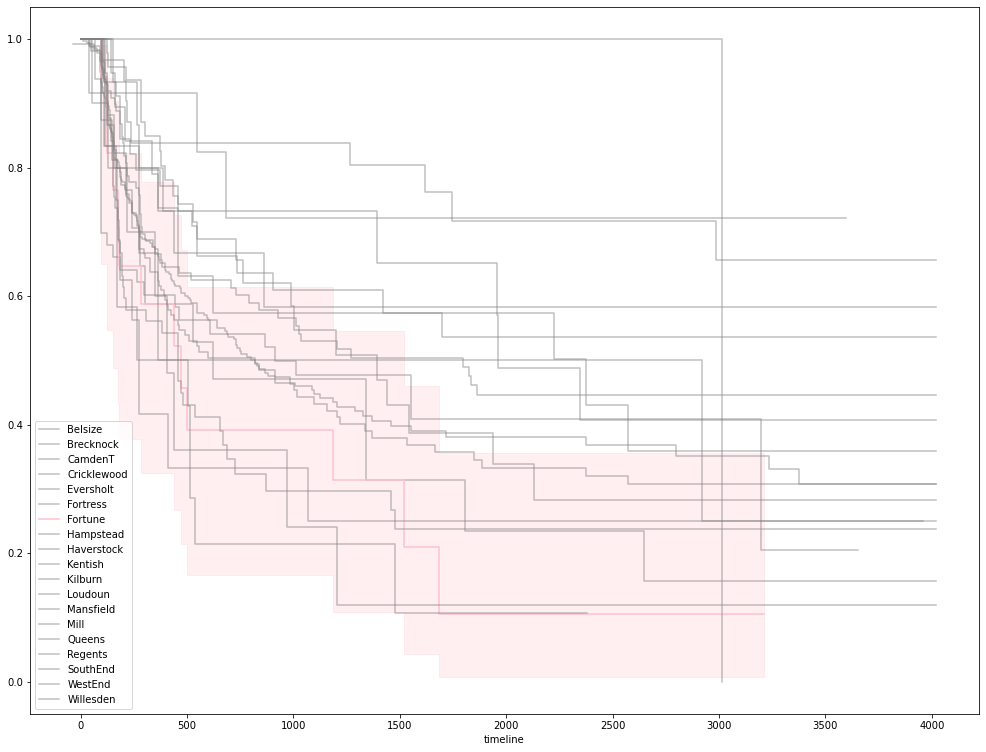

In [57]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    if highstreet == 'Fortune':
        ax = kmf.plot(ax=ax, color='pink')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)
fig.savefig('outputs_img/vacancy_survival/Fortune.jpg')

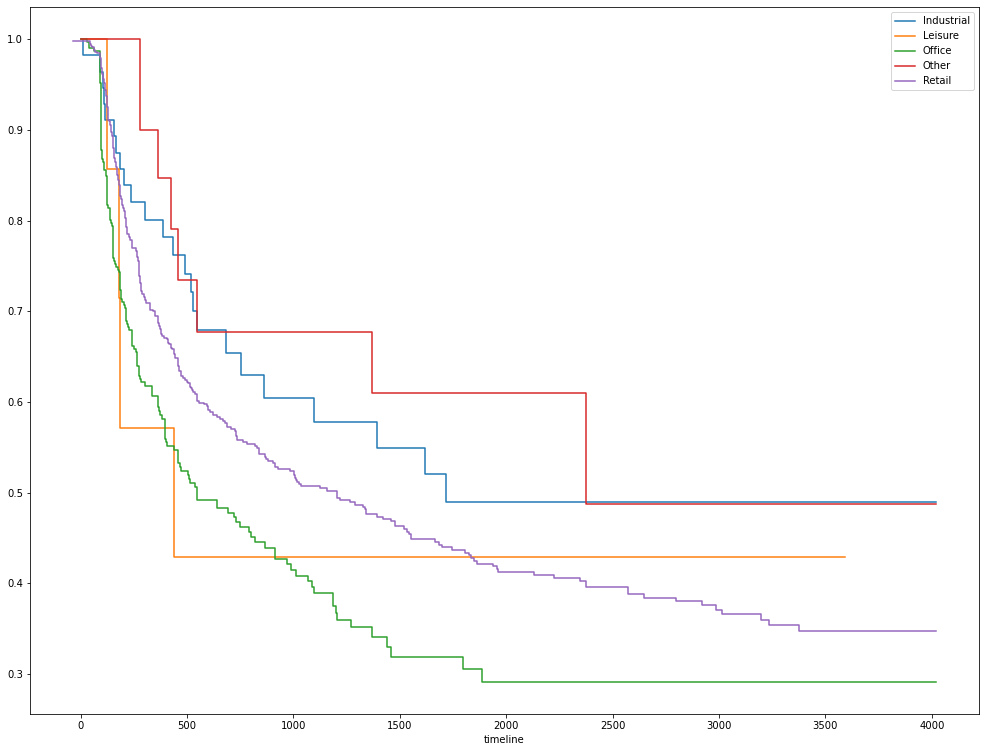

In [64]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))
ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    ax = kmf.plot(ax=ax, ci_show=False)
    
fig.savefig('outputs_img/vacancy_survival/Vacancy by category.jpg')

In [25]:
kentish = pd.read_csv("Camden High Streets/Kentish-vacant-survival.csv")

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(kentish['survival'], event_observed= kentish['vacant'])

print(kmf.survival_function_)
#print(kmf.median_)
kmf.plot()

In [27]:
kentish.loc[kentish['category'].isnull(), 'category'] = "Other"

In [28]:
kentish['category'] = kentish['category'].astype('category')

In [29]:
kentish['sub_category'] = kentish['sub_category'].astype('category')

In [ ]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    ax = kmf.plot(ax=ax, ci_show=False)

In [ ]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Industrial':
        ax = kmf.plot(ax=ax, color='b')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

In [ ]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Office':
        ax = kmf.plot(ax=ax, color='orange')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

In [ ]:
ax = plt.subplot()

for category, df_ in kentish[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Retail':
        ax = kmf.plot(ax=ax, color='r')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for sub_category, df_ in kentish[['sub_category','vacant', 'survival']].groupby('sub_category'):
    kmf.fit(df_['survival'], df_['vacant'], label=sub_category)
    ax = kmf.plot(ax=ax, ci_show=False)

In [ ]:
kmf

In [ ]:
df_retail = df.loc[df['category'] == 'Retail']

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_retail[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
#fig.savefig('Camden-Highstreets-Retail-Survival.jpg')

In [ ]:
df_office = df.loc[df['category'] == 'Office']

In [ ]:
df_office

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_office[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
#fig.savefig('Camden-Highstreets-Office-Survival.jpg')

In [ ]:
df_other = df.loc[df['category'] == 'Other']

In [ ]:
df_other

In [ ]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(1,1, figsize=(17,13))

for highstreet, df_ in df_other[['highstreet','vacant', 'survival']].groupby('highstreet'):
    kmf.fit(df_['survival'], df_['vacant'], label=highstreet)
    ax = kmf.plot(ax=ax, ci_show=False)
    
#fig.savefig('Camden-Highstreets-Other-Survival.jpg')